In [ ]:
from tensorflow.keras.models import load_model

model_path = r".h5"
model = load_model(model_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = r"val"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical', 
    shuffle=False
)


Found 480 images belonging to 4 classes.


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


15/15 [==============================] - 37s 2s/step
              precision    recall  f1-score   support

       Emine       1.00      1.00      1.00       120
     Hüseyin       1.00      1.00      1.00       120
       Kübra       1.00      1.00      1.00       120
   MuratHoca       1.00      1.00      1.00       120

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



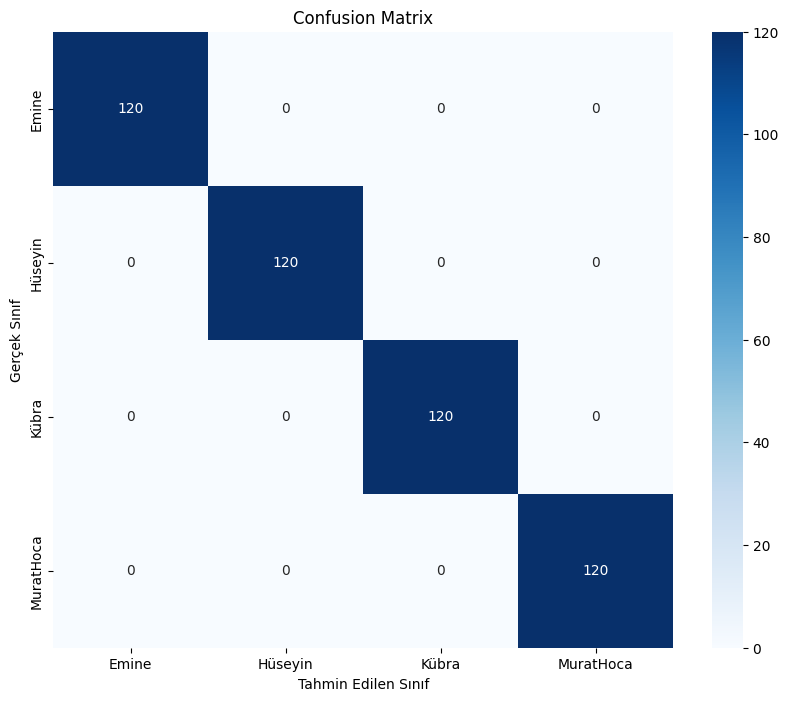

In [27]:
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

true_classes = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

print(classification_report(true_classes, pred_classes, target_names=class_labels))

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix")
plt.show()

In [28]:
import numpy as np
unique_preds = np.unique(pred_classes)
print("Model tahmin ettiği sınıflar:", unique_preds)
print("Tüm sınıflar:", list(range(len(class_labels))))


Model tahmin ettiği sınıflar: [0 1 2 3]
Tüm sınıflar: [0, 1, 2, 3]


In [ ]:
from tensorflow.keras.preprocessing import image

class_labels = ['Emine', 'Hüseyin', 'Kübra', 'MuratHoca']

def predict_single_image(img_path, model, class_labels, img_size=(240,240)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0) 
    
    preds = model.predict(img_array)
    pred_index = np.argmax(preds, axis=1)[0]
    confidence = preds[0][pred_index]
    
    print(f"Tahmin: {class_labels[pred_index]} (%{confidence*100:.2f} güven)")
    return class_labels[pred_index], confidence

pred_file = r"FOTOĞRAF DOSYASI"
predict_single_image(pred_file, model, class_labels)

1/1 [==============================] - 0s 180ms/step
Tahmin: Emine (%99.08 güven)


('Emine', 0.99078333)

In [31]:
wrong_indices = np.where(pred_classes != true_classes)[0]

print(f"Yanlış : {len(wrong_indices)}")

plt.figure(figsize=(15, 10))
for i, idx in enumerate(wrong_indices[:10]):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Gerçek: {class_labels[true_classes[idx]]}\nTahmin: {class_labels[pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Yanlış : 0


<Figure size 1500x1000 with 0 Axes>